<a href="https://colab.research.google.com/github/RafaelVendiciano/Portfolio/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

**Instruções para o Projeto**

* Você deve importar o pandas e importar a base de dados da Polícia Militar do Rio de Janeiro sobre a violência
  * O arquivo `csv` se encontra no endereço abaixo:
    * https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv
  * Este arquivo `csv` foi pré-processado minimamente por mim, para focar nos pontos aprendidos neste Módulo
  * Este é o site oficial, do Governo do Estado do Rio de Janeiro:
    * http://www.ispdados.rj.gov.br/estatistica.html
  * Um *dashboard* interativo e visual pode ser encontrado no site abaixo:
    * http://www.ispvisualizacao.rj.gov.br/index.html
  * Você está livre para apagar, alterar e acrescentar o que quiser!
  * Se você sentiu dificuldade, não se preocupe! Disponibilizei a minha própria solução para servir de guia, porém tente fazer a sua por você mesmo inicialmente.
    * Se sentir perdido é normal, mas acredite: O seu cérebro vai começar a adquirir uma capacidade nova de pensar em hipóteses e questionar dados.
  
  
---
  

# Analisando a Violência no Rio de Janeiro

O **Rio de Janeiro** é a segunda maior cidade do país, com 6,3 milhões de habitantes. A metrópole, que foi capital do Brasil de 1763 até 1960, é também o principal destino de turistas estrangeiros. Por isso, funciona como uma espécie de "vitrine" do país para o mundo. Por outro lado, é conhecida por ter altos índices de violência e tráfico de drogas, além de possuir, de longe, a polícia que mais mata do Brasil.

Nesse projeto iremos analisar um pouco mais a fundo os dados disponíveis sobre a violência do rio, a fim de retirar informações interessantes.

## Obtenção dos Dados

Os dados que serão estudados aqui foram retirados do [site oficial do Governo do Estado do Rio de Janeiro](http://www.ispdados.rj.gov.br/estatistica.html) e minimamente processados para estarem melhores para análise.

### Importando os dados

In [0]:
#importar pacotes necessários:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise Inicial dos Dados

A primeira coisa que faremos após importar o *dataset* é examiná-lo, ou seja, fazer uma **análise exploratória**. Isso possibilitará uma maior familiarização com os dados e um maior entendimento de como estão estruturados.

Quanto a dimensionalidade do banco da dados, ele é composto por 344 linhas e 56 colunas.


In [0]:
print("DIMENSÕES DO DATASET:")
print("Número de linhas:\t {}".format(df.shape[0]))
print("Número de colunas:\t {}".format(df.shape[1]))

DIMENSÕES DO DATASET:
Número de linhas:	 344
Número de colunas:	 56


É importante saber quais são as colunas do *dataset*, afinal, as colunas que são as variáveis, as informações que estão sendo tratadas no banco de dados.

Nesse caso, há diversas variáveis, desde informações quanto ao tempo, como ano e mês, quanto aos tipos de crime, entre outros.

In [0]:
print("COLUNAS DO DATASET:")
df.columns

COLUNAS DO DATASET:


Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Agora, vamos fazer o levantamento dos tipos de variáveis presentes no *dataset*, com o objetivo de sabermos quais das variáveis são numéricas e quais são categóricas.

In [0]:
print("TIPOS DAS VARIÁVEIS:")
df.dtypes

TIPOS DAS VARIÁVEIS:


vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Outra análise importante é identificar a porcentagem de dados ausentes por coluna (algo muito comum de existir em bancos de dados).

In [0]:
(df.isnull().sum() / df.shape[0]) * 100

vano                           0.000000
mes                            0.000000
hom_doloso                     0.000000
lesao_corp_morte              27.906977
latrocinio                     0.000000
hom_por_interv_policial       24.418605
tentat_hom                     0.000000
lesao_corp_dolosa              0.000000
estupro                       41.860465
hom_culposo                   24.418605
lesao_corp_culposa            27.906977
roubo_comercio                 0.000000
roubo_residencia               0.000000
roubo_veiculo                  0.000000
roubo_carga                    0.000000
roubo_transeunte               0.000000
roubo_em_coletivo              0.000000
roubo_banco                    0.000000
roubo_cx_eletronico           41.860465
roubo_celular                 31.395349
roubo_conducao_saque          41.860465
roubo_apos_saque              41.860465
roubo_bicicleta               80.232558
outros_roubos                  0.000000
total_roubos                   0.000000


Por último, para ter uma ideia mais visual das informações, vou mostrar o começo e o fim do banco de dados, ou seja, suas primeiras e últimas 5 linhas.

In [0]:
print("5 PRIMEIRAS LINHAS:")
df.head()

5 PRIMEIRAS LINHAS:


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [59]:
print("5 ÚLTIMAS LINHAS:")
df.tail()


5 ÚLTIMAS LINHAS:


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


### Resumo:

* O *DataFrame* tem 344 linhas e 56 variáveis, das quais todas são numéricas
* Não há nenhuma variável categórica, todas são numéricas.
* Várias colunas tem dados faltando, algumas, com mais da metade de valores ausentes, chegando a ter um caso com 80%.
* Os registros de crimes vão de 1991 até 2019 e cada linha representa um mês

## Informações Estatísticas da Violência no Rio de Janeiro

Para esta parte, iremos calcular estatísticas desse grande conjunto de números para podermos retirar informações realmente importantes.

Para que possamos tirar informações mais precisas, vou fazer análise apenas das variáveis que não tem valores ausentes.

Primeiramente, vou utilizar do metodo `describe`, que nos fornece, de forma rápida, um entendimento dos dados.



In [57]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

A tabela acima, formada ao usar o metodo `describe` no *DataFrame*, nos fornece informações, para cada coluna, como:
* O número de entradas. Algumas chegam ao máximo de 344, já as que tem valores ausentes tem menor quantidade.
* A média.
* O desvio padrão , que nos diz o grau de dispersão dos valores em relação a média.
* O valor mínimo e máximo.
* Os percentis (25%, 50%, 75%), que informa qual o valor exato que separa a coluna, em certas porcentagens, de valores menores e maiores que ele. Exemplo para `hom_doloso`: O percentil de 50% (507) nos informa que 50% dos valores da coluna são menores que ele e 50% são maiores. o percentil de 50% também leva o nome de mediana e é uma importante informação estatística.

Agora vamos calcular mèdias das variáveis: `roubo_veiculo`, `furto_veiculos`, `recuperacao_veiculos`.

In [25]:
print("Médias:")
print("roubo_veiculo:\t{}".format(df.roubo_veiculo.mean()))
print("furto_veiculos:\t{}".format(df.furto_veiculos.mean()))
print("recuperacao_veiculos:\t{}".format(df.recuperacao_veiculos.mean()))

Médias:
roubo_veiculo:	2448.6976744186045
furto_veiculos:	1674.671511627907
recuperacao_veiculos:	1772.2383720930231


Os dados acima nos informam que:
* A média de roubos de veiculos por mês no Rio, de 1991 até 2019, foi de aproximadamente **2449**.
* A média de furtos de veículos por mês no Rio, de 1991 até 2019, foi de aproximadamente **1675**.
* A média de recuperação de veículos por mês no Rio de 1991, até 2019, foi de aproximadamente **1772**.

Já que temos acesso a essas variáveis, podemos calcular a porcentagem dos carros que são recuperados dos roubados ou furtados.

In [38]:
roubo = df.roubo_veiculo.sum()
furto = df.furto_veiculos.sum()
recuperado = df.recuperacao_veiculos.sum()
x = recuperado / (roubo + furto)
print("No Rio, de 1991 até 2019, aproximadamente {}% dos carros roubados ou furtados, foram recuperados!".format(round(x * 100)))

No Rio, de 1991 até 2019, aproximadamente 43.0% dos carros roubados ou furtados, foram recuperados!


Já que estamos analisando a violência, também seria interessante buscar informações sobre homicídio doloso, que é o tipo de homicídio onde há a intenção de matar.


In [40]:
print("O menor número de homícidios dolosos em um mês foi de:{}".format(df.hom_doloso.min()))
print("O maior número de homícidios dolosos em um mês foi de:{}".format(df.hom_doloso.max()))
print("Ná média, ocorreram aproximadamente {:.0f} homicidios dolosos mensalmente durante o período".format(df.hom_doloso.mean()))

O menor número de homícidios dolosos em um mês foi de:272
O maior número de homícidios dolosos em um mês foi de:831
Ná média, ocorreram aproximadamente 505 homicidios dolosos mensalmente durante o período


## Visualização de Dados

Agora que temos muitas informações que conseguimos retirar do *dataset*, vamos colocá-las em gráficos para ficar mais apresentável.

Primeiro um histograma, que é um gráfico de distribuição de frequência.

Plote e comente os seguintes gráficos:

* Histograma de `hom_doloso`
* Gráfico de linhas para a variável `roubo_em_coletivo`


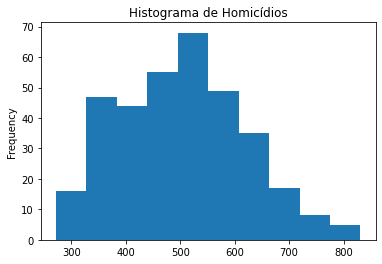

In [54]:
df.hom_doloso.plot(kind="hist", title="Histograma de Homicídios");

Como podemos ver no Histograma acima, o caso que mais ocorre é ter entre 500 e 600 homicídios por mês, com quase 70 ocorrências de messes com essa quantidade de homicídios.

Outro fato interessante, é que como o histograma é quase simétrico, a média, que é 505, assim como calculamos lá em cima, acaba sendo parecida com a mediana (percentil 25%), que é 507.

Agora vou mostrar um gráfico de linha para roubo em coletivo.

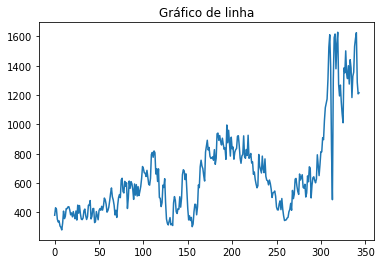

In [55]:
df.roubo_em_coletivo.plot(title = "Gráfico de linha");

Como podemos ver, a quantidade de roubos em coletivo teve um aumento drástico nos últimos anos, lembrando que as informações contidas no banco de dados acabam em agosto de 2019.

## Conclusão

Fizemos uma análise bem simples da base de dados da polícia militar sobre a violência no Rio de Janeiro. 

Mesmo sem usar as colunas com valores nulos, e das que estavam completas, estudar apenas algumas, já deu para tirar diversas informações dos dados, como o aumento do número de roubos em coletivo, a quantidade de homicídios que geralmente ocorrem mensalmente, a porcentagem de carros que são recuperados entre os roubados, etc...

Espero que esse projeto possa ter sido útil e tenha trazido um pouco de conhecimento a você!